In [1]:
# Import/define stuff we'll need
import random
import timeit
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
import numpy as np


def findinlist(n, l):
    for i in range(len(l)):
        if l[i] == n:
            return True
    return False

# Linear search performance analysis

In [2]:
avgtimes = []
# For multiple possible input lengths...
listlengths = [1000, 2000, 5000, 10000]
for listlength in listlengths:
    # Generate a list of that input length,
    numbers = [x for x in range(listlength)]
    rez = []
    # then, consider 1000 different random permutations of that list. For each
    # permutation, time how long it takes to find the number 5 in the list.
    # For increased accuracy, use timeit and ask it to run the test 100 times
    for i in range(1000):
        random.shuffle(numbers)
        tm = timeit.timeit("findinlist(5, numbers)", setup="from __main__ import findinlist, numbers", number=100)
        rez.append(tm/100)
    # Then, compute the average execution times across all permutations
    # and add it to our list of average times
    avg = sum(rez) / len(rez)
    avgtimes.append(avg)
    print("Average time for list of length %d: %f" % (listlength, avg))

Average time for list of length 1000: 0.000012
Average time for list of length 2000: 0.000027
Average time for list of length 5000: 0.000064
Average time for list of length 10000: 0.000123


# Linear regression time!
+ Linear regression finds the line, on the cartesian plane, which is closer to a set of points (more precisely, finds the line that minimizes the sum of the squared distances between the line and each point).
+ Useful to find whether a simple linear relationship exists between input and output
    + In this case, between length of input and elapsed time
+ Decent modeling/data exploration approach, particularly if not much is known about the data

In [3]:
from IPython.display import Video
Video("linear.mp4", embed=True)

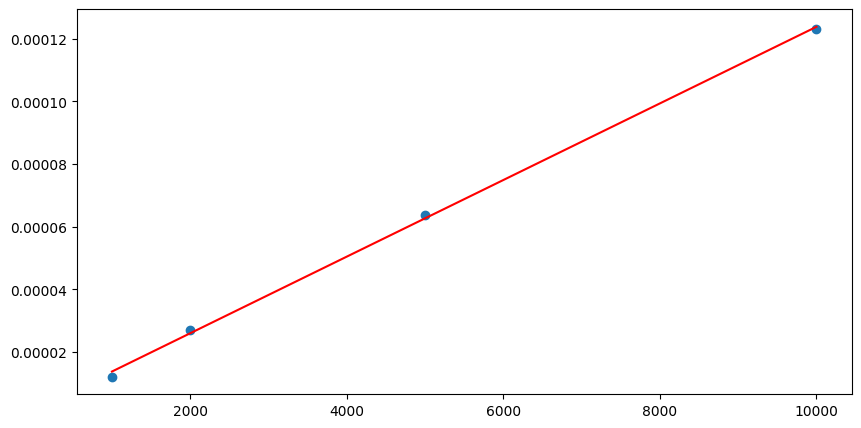

In [4]:
# Now, compute linear regression to find the slope and intercept of the line
# that most accurately describes the relationship between input length and time.
# Then, plot the data and the line.
slope, intercept = np.polyfit(listlengths, avgtimes, 1)
plt.scatter(listlengths, avgtimes)
linevalues = [slope * x + intercept for x in listlengths]
plt.plot(listlengths, linevalues, 'r')

In [5]:
# Finally, print out the linear relationship between input length and time.
print("The linear model is: t = %.2e * n + %.2e" % (slope, intercept))

The linear model is: t = 1.22e-08 * n + 1.53e-06
